# Atelier 5 : Topic Mining


L'objectif de cet atelier est de decouvrire le "Topic Mining" à travers un dataset de news. Le dataset comprend 18846 posts appartenant à 20 topics differents et qui sont reparties en deux groupes: un dataset d'apprentissage et un dataset de test.

# 1. Praitraitements / NLP

## 1.1 Recuperration du corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups
#fetch return a brunch that is a dictionary-like object, with the following attributes.
dataset = fetch_20newsgroups(subset='train')
data=dataset.data
targets=dataset.target
print(dataset.target_names)
print(data[3],targets[0])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some informa

## 1.2 Cleaning

Le corpus comporte des posts qui necessitent un cleaning afin de ne garder que les donnees qui vont nous servir dans l'opération du topic mining.
   * supprimer les emails
   * supprimer les adresses des sites web
   * supprimer les nombres et les caractères spéciaux
   * supprimer les stopwords(on la reporte vers l'étape de vectorisation)
   * supprimer les terms non sigificatifs (non anglais )
   
  Utiliser la librairie RE pour la manipulation des expressions regulière

In [2]:
'''
.           Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	        Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	    Parentheses that indicate the scope of the operators
'''


'''
\number
Correspond au contenu du groupe du même nombre. Les groupes sont numérotés à partir de 1. Par exemple, (.+) \1 correspond à 'the the' ou '55 55', mais pas à 'thethe' (notez l’espace après le groupe). Cette séquence spéciale ne peut être utilisée que pour faire référence aux 99 premiers groupes. Si le premier chiffre de number est 0, ou si number est un nombre octal de 3 chiffres, il ne sera pas interprété comme une référence à un groupe, mais comme le caractère à la valeur octale number. À l’intérieur des '[' et ']' d’une classe de caractères, tous les échappements numériques sont traités comme des caractères.

\A
Correspond uniquement au début d’une chaîne de caractères.

\b
Correspond à la chaîne vide, mais uniquement au début ou à la fin d’un mot. Un mot est défini comme une séquence de « caractères de mots ». Notez que formellement, \b est défini comme la liaison entre \w et \W (et inversement), ou entre \w et le début/fin d’un mot. Cela signifie que r'\bfoo\b' validera 'foo', 'foo.', '(foo)' ou 'bar foo baz' mais pas 'foobar' ou 'foo3'.

Les caractères alphanumériques Unicode sont utilisés par défaut dans les motifs Unicode, mais cela peut être changé en utilisant l’option ASCII. Les délimitations de mots sont déterminées par la locale si l’option LOCALE est utilisée. À l’intérieur d’un intervalle de caractères, \b représente le caractère backspace, par compatibilité avec les chaînes littérales Python.

\B
Correspond à la chaîne vide, mais uniquement quand elle n’est pas au début ou à la fin d’un mot. Cela signifie que r'py\B' valide 'python', 'py3' ou 'py2', mais pas 'py', 'py.' ou 'py!'. \B est simplement l’opposé de \b, donc les caractères de mots dans les motifs Unicode sont les alphanumériques et tirets bas Unicode, bien que cela puisse être changé avec l’option ASCII. Les délimitations de mots sont déterminées par la locale si l’option LOCALE est utilisée.

\d
Pour les motifs Unicode (str) :
Valide n’importe quel chiffre décimal Unicode (soit tout caractère Unicode de catégorie [Nd]). Cela inclue [0-9], mais aussi bien d’autres caractères de chiffres. Si l’option ASCII est utilisée, seuls les caractères de la classe [0-9] correspondront (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [0-9] explicite).

Pour les motifs 8-bit (bytes) :
Valide n’importe quel chiffre décimal ; équivalent à [0-9].

\D
Valide tout caractère qui n’est pas un chiffre décimal. C’est l’opposé de \d. Si l’option ASCII est utilisée, cela devient équivalent à [^0-9] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser explicitement [^0-9]).

\s
Pour les motifs Unicode (str) :
Valide les caractères d’espacement Unicode (qui incluent [ \t\n\r\f\v] et bien d’autres, comme les espaces insécables requises par les règles typographiques de beaucoup de langues). Si l’option ASCII est utilisée, seuls les caractères de la classe [ \t\n\r\f\v] sont validés (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [ \t\n\r\f\v] explicite).

Pour les motifs 8-bit (bytes) :
Valide les caractères considérés comme des espacements dans la table ASCII ; équivalent à [ \t\n\r\f\v].

\S
Valide tout caractère qui n’est pas un caractère d’espacement. c’est l’opposé de \s. Si l’option ASCII est utilisée, cela devient équivalent à [^ \t\n\r\f\v] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [^ \t\n\r\f\v] explicite).

\w
Pour les motifs Unicode (str) :
Valide les caractères Unicode de mot ; cela inclut la plupart des caractères qui peuvent être compris dans un mot d’une quelconque langue, aussi bien que les nombres et les tirets bas. Si l’option ASCII est utilisée, seuls les caractères de la classe [a-zA-Z0-9_] sont validés (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [a-zA-Z0-9_] explicite).

Pour les motifs 8-bit (bytes) :
Valide les caractères alphanumériques de la table ASCII ; équivalent à [a-zA-Z0-9_]. Si l’option LOCALE est utilisée, les caractères considérés alphanumériques dans la locale et le tiret bas seront acceptés.

\W
Valide tout caractère qui n’est pas un caractère de mot. C’est l’opposé de \w. Si l’option ASCII est utilisée, cela devient équivalent à [^a-zA-Z0-9_] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [^a-zA-Z0-9_] explicite). Si l’option LOCALE est utilisée, les caractères considérés alphanumériques dans la locale courrante, et le tiret bas, seront acceptés.

\Z
Correspond uniquement à la fin d’une chaîne de caractères
'''

import re
def cleaninng(doc):
    return re.sub("\S+@\S+|(www\S+)|[0-9]+|[@_!#$%^&*()<>?/\|}{~:]*","", doc)


data= [cleaninng(doc) for doc in data]

import nltk
nltk.download('words')

'''Supprimer les terms non anglais'''
words = set(nltk.corpus.words.words())
def English(doc):
    return " ".join(w for w in nltk.wordpunct_tokenize(doc) if w.lower() in words)

data= [English(doc) for doc in data]
print(data[0],targets[0])

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dscon\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


From where s my thing Subject WHAT car is this Posting Host Organization University of College Park I was wondering if anyone out there could enlighten me on this car I saw the other day It was a door sports car to be from the late s early s It was a The were really small In addition the front bumper was separate from the rest of the body This is all I know If anyone can a model name engine specs of production where this car is made history or whatever you have on this funky looking car please e mail Thanks brought to you by your neighborhood 7


## 1.2 Lemmatisation

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words

lemmmatizer=WordNetLemmatizer()

def lemmmatization(doc):
    '''lemmatisation du document doc'''
    return " ".join(lemmmatizer.lemmatize(w) for w in word_tokenize(doc))


corpus_lemetized=[lemmmatization(doc) for doc in data]
print(corpus_lemetized[0])

From where s my thing Subject WHAT car is this Posting Host Organization University of College Park I wa wondering if anyone out there could enlighten me on this car I saw the other day It wa a door sport car to be from the late s early s It wa a The were really small In addition the front bumper wa separate from the rest of the body This is all I know If anyone can a model name engine spec of production where this car is made history or whatever you have on this funky looking car please e mail Thanks brought to you by your neighborhood


# 2. Approche Mono-Terme

Récupérer la représentation vectorielle des differents documents avec le TF-IDF

In [4]:
corpus_lemetized[:10]

['From where s my thing Subject WHAT car is this Posting Host Organization University of College Park I wa wondering if anyone out there could enlighten me on this car I saw the other day It wa a door sport car to be from the late s early s It wa a The were really small In addition the front bumper wa separate from the rest of the body This is all I know If anyone can a model name engine spec of production where this car is made history or whatever you have on this funky looking car please e mail Thanks brought to you by your neighborhood',
 'From Guy Subject SI Clock Poll Final Call Summary Final call for SI clock SI acceleration clock upgrade Article I D Organization University of Posting Host u A fair number of brave who their SI clock oscillator have their for this poll Please send a brief message your with the procedure Top speed rated speed add on and heat hour of usage per day floppy disk functionality with and m are especially I will be in the next two day so please add to the 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized)
pd.DataFrame(vect.toarray(), columns=vectorizer.get_feature_names_out())


,aa,aal,aba,abacus,abandon,abandoned,abandonment,abate,abatement,abbey,...,zone,zoning,zoo,zooid,zoological,zoology,zoom,zorro,zowie,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Réaliser une fonction de scoring qui permettra de déterminer les mots les plus pertinents pour être des topics.

In [6]:
import numpy
def scoring(k):
    ''''Proposer un traitement qui retourne la liste  des k termes les plus pertinents'''
    
    vect=vect.toarray()
    feature_names=vectorizer.get_feature_names()
    scores=[]
    for i in range(0, len(vect[0])):
        s=[vect[j][i] for j in range(len(vect))]
        scores.append(numpy.mean(s))
    topics=[]
    for i in range(k):
        topics.append(feature_names[scores.index(max(scores))])
        feature_names.pop(scores.index(max(scores)))
        scores.pop(scores.index(max(scores)))

    return topics, feature_names,scores


Modifier le code precedent pour identifier les topics similaires (selon un seuil predeterminé) et ne garder que le plus pertinents. chaque terme supprimé doit etre remplacé par le terme suivant dans la liste des scores.
   * Utiliser l'approche semantique lexicale
   * Utiliser l'approche semantiqe statistique: le wordembedding

In [7]:
def scoring_v2(k, seuil=0.7):
    topics, feature_names,scores= scoring(k)
    print(f"Topics {topics}, feature_names {feature_names}, scores {scores}")
    for i in range(0,len(topics)-1):
        for j in range(i+1, len(topics)):
            if sim(topics[i],topics[i])>=seuil:
                topics[j]=feature_names.pop(scores.index(max(scores)))
                scores.pop(scores.index(max(scores)))
    return topics

def sim(t1,t2):
    "a completer"
    t1_vector=vect[:,vectorizer.get_feature_names_out().index(t1)]
    t2_vector=vect[:,vectorizer.get_feature_names_out().index(t2)]
    return numpy.dot(t1_vector,t2_vector)/(numpy.linalg.norm(t1_vector)*numpy.linalg.norm(t2_vector))



Calculer la distribution des topics par documents.

In [8]:


# computes topics distribution for each document
def topics_distribution(corpus, topics):
    vect=vectorizer.transform(corpus).toarray()
    feature_names=vectorizer.get_feature_names_out()
    scores=[]
    for i in range(0, len(vect[0])):
        s=[vect[j][i] for j in range(len(vect))]
        scores.append(numpy.mean(s))
    topics_distribution=[]
    for i in range(len(corpus)):
        topics_distribution.append([numpy.mean([vect[i][feature_names.index(t)] for t in topics]) for t in topics])
    return topics_distribution 

Essayer d'ameliorer les resultats obtenus en utilisant par exemple un vocabulaire  preetabli ou en ne considerant que les parties significatives du document(Subject, Summary, keywords... )

# 2. LSA


## Vectorisation

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_lemetized = corpus_lemetized
vectorizer = TfidfVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(data_lemetized)
import pandas as pd
pd.DataFrame(vect.toarray(), columns=vectorizer.get_feature_names_out())

,aa,aal,aba,abacus,abandon,abandoned,abandonment,abate,abatement,abbey,...,zone,zoning,zoo,zooid,zoological,zoology,zoom,zorro,zowie,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Decomposition SVD de notre corpus selon le vocabulaire

In [10]:
from sklearn.decomposition import TruncatedSVD
k=20
lsa= TruncatedSVD(n_components=k)
U = lsa.fit_transform(vect)
D= lsa.singular_values_
V_T = lsa.components_.T

## Visualisation

In [11]:
doc_topic_matrix=pd.DataFrame(data=U, index = [f'Doc_{r}' for r in range(0,U.shape[0])], columns = [f'Topic_{r}' for r in range(0,V_T.shape[1])])
doc_topic_matrix

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
Doc_0,0.201049,0.018957,-0.100200,-0.083000,0.019760,-0.048634,-0.142208,0.054754,-0.105393,0.282671,0.173009,-0.069159,0.116471,-0.057345,-0.134113,-0.015518,-0.134130,-0.047927,-0.029631,0.025309
Doc_1,0.094243,-0.054455,-0.019245,-0.003359,0.024625,-0.030699,0.001780,-0.015681,0.016047,0.010935,0.017994,-0.029507,-0.027169,-0.003665,0.007166,-0.008071,-0.004519,0.006321,-0.048228,0.044349
Doc_2,0.282567,-0.043107,-0.025821,0.026318,0.030342,0.031593,-0.009796,0.004135,-0.015778,0.024754,0.029986,-0.030362,-0.025610,0.113475,-0.013521,0.003046,-0.023865,0.030588,-0.024894,-0.006588
Doc_3,0.215606,-0.085882,0.073654,-0.053396,-0.050755,-0.047127,0.036138,0.018168,-0.008285,0.006247,0.089918,-0.037392,-0.061607,0.012818,0.001445,-0.024082,0.131321,0.059810,0.068339,0.041099
Doc_4,0.132909,-0.006618,-0.000254,0.020322,-0.005049,0.033091,-0.023172,-0.018143,0.028644,0.009638,-0.017265,-0.040985,-0.053333,-0.018445,0.031038,-0.020700,0.008082,0.018968,-0.031523,0.018181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc_11309,0.109639,0.027184,-0.002600,-0.004240,0.002099,0.005672,-0.030809,0.005625,-0.030100,-0.029230,-0.013865,-0.012708,-0.010025,0.019430,-0.006756,0.005582,0.011135,0.024112,0.007994,0.000467
Doc_11310,0.176286,-0.173972,-0.051537,0.063340,0.127914,-0.063321,-0.000056,0.007993,0.003894,0.047368,-0.038447,0.089894,-0.131442,0.226776,-0.003724,-0.005212,-0.039195,-0.072129,0.071824,0.088662
Doc_11311,0.086185,-0.013880,0.013670,-0.009567,0.016779,0.002390,0.005412,0.004298,0.019261,0.041875,0.054796,0.016095,0.006456,0.011938,0.005243,0.020700,0.065867,0.002545,0.020886,-0.011235
Doc_11312,0.109684,-0.017480,0.008716,-0.001000,-0.048531,0.001305,-0.036650,-0.020940,0.081933,0.013913,-0.067112,-0.052768,-0.064337,-0.019536,-0.002127,0.006118,-0.012551,-0.000999,0.037439,-0.025444


<Axes: >

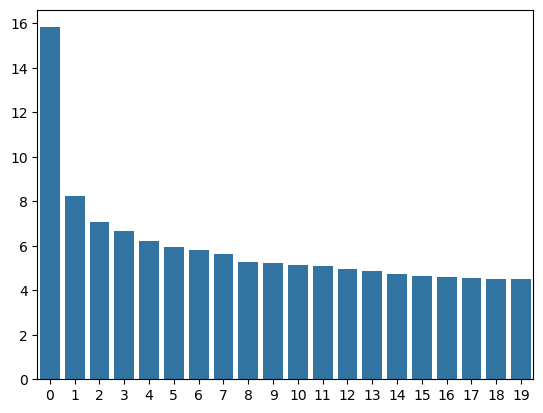

In [12]:
import seaborn as sns
sns.barplot(x=list(range(len(D))), y = D)

In [13]:
term_topic_matrix=pd.DataFrame(data=V_T, index = vectorizer.get_feature_names_out(), columns = [f'Topic_{r}' for r in range(0,V_T.shape[1])])
term_topic_matrix

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
aa,4.282446e-03,-2.087794e-03,-2.349240e-03,-1.101943e-03,-2.716246e-04,2.891420e-03,3.402090e-03,-1.988603e-03,-5.537219e-03,5.002595e-03,3.895707e-03,5.840312e-03,2.856384e-03,2.539186e-03,-7.212120e-04,5.761525e-03,-5.792518e-03,1.303627e-03,-4.242090e-03,1.720669e-03
aal,4.908270e-09,6.778901e-09,1.037278e-08,-5.778333e-09,3.048822e-08,6.762998e-08,-8.118216e-08,2.506560e-09,2.663134e-08,-2.082753e-07,-1.243470e-08,1.921600e-07,-3.919984e-08,-4.046733e-08,-3.071457e-07,-4.188966e-08,2.146793e-07,-1.571782e-07,-1.663685e-07,-2.538775e-07
aba,1.510421e-05,-2.380714e-05,-2.573328e-05,-1.927864e-05,-7.926892e-06,-4.096039e-05,-1.142726e-05,-1.010891e-05,1.708699e-05,-6.704603e-06,-2.287704e-06,2.435809e-05,-2.752594e-05,3.395388e-05,-9.249110e-07,1.119426e-05,-1.146936e-05,-7.830925e-05,-7.129283e-06,-3.258532e-05
abacus,2.878948e-05,-7.202851e-05,-1.890233e-05,5.254051e-06,-6.512409e-05,-7.399320e-05,-4.630261e-05,-3.533896e-05,-4.181054e-05,5.659950e-05,1.796245e-04,1.393688e-04,1.325906e-04,8.237088e-05,1.273765e-05,5.940998e-05,-6.238603e-05,9.281606e-05,2.038020e-06,1.833060e-04
abandon,1.293472e-03,1.314995e-03,3.199440e-04,1.230498e-03,-3.118637e-04,1.035573e-03,-9.068182e-04,-2.304078e-04,1.717509e-04,-2.521453e-03,7.514328e-04,1.074987e-03,1.701924e-03,-1.742212e-04,2.096712e-03,-3.144573e-04,1.431644e-04,3.807202e-04,-8.912843e-04,-1.315051e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoology,5.360945e-03,2.360869e-03,3.533069e-03,-8.639385e-04,8.089601e-03,1.109797e-02,-1.293499e-02,-4.796266e-03,1.185335e-02,2.099578e-02,2.820002e-02,-3.090986e-02,-1.276788e-02,-2.113484e-02,5.325709e-03,4.620997e-03,6.294611e-03,-9.814336e-03,9.677835e-03,2.411162e-03
zoom,1.969979e-03,-3.445253e-03,-1.238400e-03,5.650986e-04,-1.217531e-03,-2.788210e-03,-2.319263e-03,1.830725e-03,-2.626696e-03,2.126852e-03,4.818986e-03,3.388893e-03,2.381565e-03,4.769016e-03,-8.877203e-05,-3.808612e-03,-3.649723e-03,3.900331e-03,6.377640e-04,-3.015394e-03
zorro,3.630471e-04,-9.069579e-04,-1.561199e-04,5.891716e-04,2.935354e-03,-7.308243e-04,4.780198e-04,-5.068625e-04,1.137683e-03,-1.732676e-03,-8.484088e-04,-1.110939e-03,4.235523e-05,-3.744263e-03,-1.291009e-03,4.875110e-04,-4.660029e-03,2.462243e-03,3.676236e-03,-1.757733e-03
zowie,3.321747e-05,1.569618e-05,-1.261575e-05,-4.893662e-05,2.874874e-05,3.594656e-05,-1.238253e-04,-7.658322e-06,-1.445378e-04,1.669743e-04,8.593628e-05,-1.944951e-04,-3.131272e-05,-1.590205e-04,2.355918e-05,2.119893e-05,7.096774e-05,-3.354733e-05,-1.209071e-05,1.264046e-04


<Axes: title={'center': 'les 10 terms les plus pertinents dans le Topic 4'}, ylabel='None'>

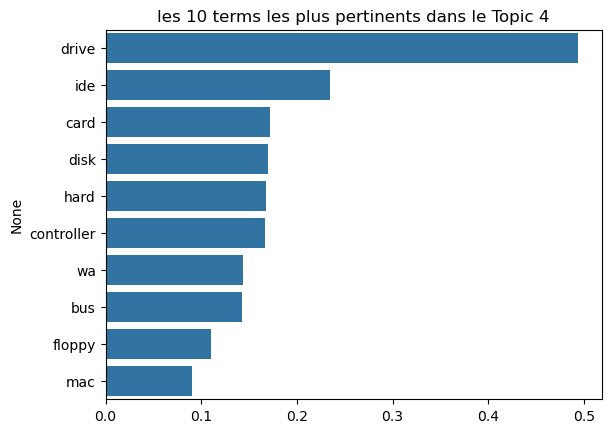

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

data = term_topic_matrix[f'Topic_4']
data = data.sort_values(ascending=False)
top_10 = data[:10]
title='les 10 terms les plus pertinents dans le Topic 4'
plt.title(title)
sns.barplot(x= top_10.values, y=top_10.index)


# 3. LDA
## Vectorisation

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

#Bag of words
vectorizer = CountVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized)


## Modèle  LDA

In [16]:
from sklearn.decomposition import LatentDirichletAllocation


alpha=1/20 # valeur par defaut
eta=1/20 # valeur par defaut
lda = LatentDirichletAllocation(n_components=20,doc_topic_prior=alpha,topic_word_prior=eta)
theta=lda.fit_transform(vect) #  distribution topics/document
beta=lda.components_  #  distribution mots/topics

## Evaluation  

In [17]:
# Log Likelyhood: Higher the better
print("Likelihood: ", lda.score(vect))
# Perplexity: Lower the better.
print("Perplexité: ", lda.perplexity(vect))
# visualisation des parametres du modèle
print(lda.get_params())

Likelihood:  -7910792.748932846
Perplexité:  1620.3730679387234
{'batch_size': 128, 'doc_topic_prior': 0.05, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': 0.05, 'total_samples': 1000000.0, 'verbose': 0}


## Visualisation  

In [18]:
#Visualisation de la matrice theta des documents X topics

doc_topic_matrix=pd.DataFrame(data=theta, index = [f'Doc_{r}' for r in range(0,theta.shape[0])], columns = [f'Topic_{r}' for r in range(0,beta.T.shape[1])])
doc_topic_matrix


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
Doc_0,0.001111,0.001111,0.001111,0.001111,0.852227,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.127773,0.001111
Doc_1,0.000926,0.000926,0.000926,0.000926,0.200734,0.000926,0.000926,0.000926,0.000926,0.340623,0.000926,0.000926,0.000926,0.087475,0.000926,0.000926,0.177093,0.000926,0.180187,0.000926
Doc_2,0.000446,0.000446,0.000446,0.000446,0.166972,0.000446,0.024048,0.000446,0.039409,0.387229,0.060043,0.229052,0.087443,0.000446,0.000446,0.000446,0.000446,0.000446,0.000446,0.000446
Doc_3,0.001136,0.001136,0.001136,0.001136,0.001136,0.232909,0.001136,0.001136,0.001136,0.181281,0.001136,0.001136,0.001136,0.001136,0.001136,0.001136,0.042857,0.001136,0.524770,0.001136
Doc_4,0.000847,0.000847,0.375927,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.370528,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.239138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc_11309,0.374837,0.000446,0.109150,0.000446,0.000446,0.000446,0.000446,0.000446,0.064789,0.099617,0.000446,0.147484,0.000446,0.000446,0.000446,0.197873,0.000446,0.000446,0.000446,0.000446
Doc_11310,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.070147,0.819305,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.090781
Doc_11311,0.001087,0.001087,0.001087,0.001087,0.552786,0.001087,0.001087,0.001087,0.001087,0.147705,0.001087,0.001087,0.001087,0.001087,0.192454,0.089664,0.001087,0.001087,0.001087,0.001087
Doc_11312,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.774602,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.078264,0.000794,0.133643


<Axes: title={'center': 'les 10 terms les plus pertinents dans le Topic 1'}, ylabel='None'>

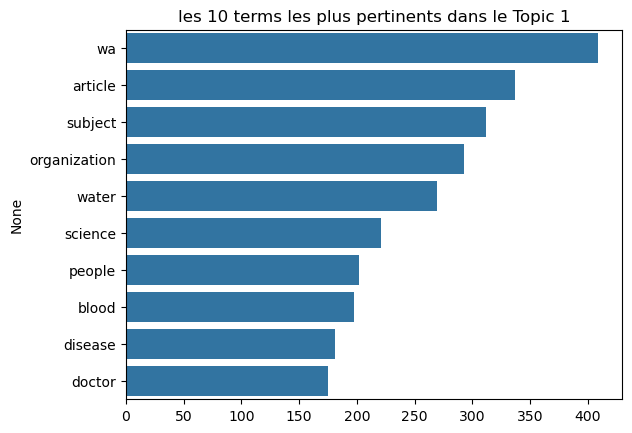

In [19]:
#affichage de la matrice beta des termes x Topics

term_topic_matrix=pd.DataFrame(data=beta.T, index = vectorizer.get_feature_names_out(), columns = [f'Topic_{r}' for r in range(0,beta.T.shape[1])])
term_topic_matrix


from matplotlib import pyplot as plt
import seaborn as sns

data = term_topic_matrix[f'Topic_0']
data = data.sort_values(ascending=False)
top_10 = data[:10]
title='les 10 terms les plus pertinents dans le Topic 1'
plt.title(title)
sns.barplot(x= top_10.values, y=top_10.index)




In [20]:
# 

 # Exercice
   * Realiser une visualisation globale des differentes topics decouverts pour la LSA et la LDA
   * Appliquer le modèle unigrame language model pour decouvrir un topic par document

**LDA**

In [21]:
# %pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np 
import pandas as pd


data = pyLDAvis.prepare(
    topic_term_dists=lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis],
    doc_topic_dists=lda.transform(vect),
    doc_lengths=[len(doc.split()) for doc in corpus_lemetized],
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=np.array(vect.sum(axis=0)).flatten()
)

pyLDAvis.display(data)


**LSA**

In [22]:
# Conversion de la matrice pour pyLDAvis
data = pyLDAvis.prepare(
    topic_term_dists=lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis],
    doc_topic_dists=lda.transform(vect),
    doc_lengths=[len(doc.split()) for doc in corpus_lemetized],
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=np.array(vect.sum(axis=0)).flatten()
)

pyLDAvis.display(data)

**Language ModelUnigramme**

In [23]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(corpus_lemetized)
vocab = vectorizer.get_feature_names_out()

def unigram_language_model(doc_matrix, vocab, top_n=5):
    topics = []
    for doc_idx in range(doc_matrix.shape[0]):
        word_counts = doc_matrix[doc_idx].toarray().flatten() 
        top_word_indices = word_counts.argsort()[-top_n:][::-1]
        top_words = [vocab[i] for i in top_word_indices]
        topics.append(top_words)
    return topics

document_topics = unigram_language_model(doc_term_matrix, vocab)

results = pd.DataFrame({
    'Document': [f"Document {i+1}" for i in range(len(corpus_lemetized))],
    'Topic Words': [' '.join(topic) for topic in document_topics]
})

print("Topics par document :")
print(results)


Topics par document :
             Document                            Topic Words
0          Document 1         car wa know university college
1          Document 2                clock si poll speed guy
2          Document 3       display anybody doe computer don
3          Document 4       joe green computer chip division
4          Document 5    warning error known question launch
...               ...                                    ...
11309  Document 11310  patient scan diagnosis headache brain
11310  Document 11311              mac new screen blank plus
11311  Document 11312      cooler mounting ended socket case
11312  Document 11313  sphere space graphics collins central
11313  Document 11314       number stolen help honda alumnus

[11314 rows x 2 columns]
